In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('diabetes_data_upload.csv')  # Use o nome do arquivo que você carregou
#df = pd.read_csv('diabetes_data_upload.csv')

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [4]:
df['Gender'] = df['Gender'].apply(str)
df['class'].value_counts(), df['Gender'].value_counts()

(class
 Positive    320
 Negative    200
 Name: count, dtype: int64,
 Gender
 Male      328
 Female    192
 Name: count, dtype: int64)

In [5]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Polyuria'] = df['Polyuria'].map({'Yes': 1, 'No': 0})
df['Polydipsia'] = df['Polydipsia'].map({'Yes': 1, 'No': 0})
df['sudden weight loss'] = df['sudden weight loss'].map({'Yes': 1, 'No': 0})
df['weakness'] = df['weakness'].map({'Yes': 1, 'No': 0})
df['Polyphagia'] = df['Polyphagia'].map({'Yes': 1, 'No': 0})
df['Genital thrush'] = df['Genital thrush'].map({'Yes': 1, 'No': 0})
df['visual blurring'] = df['visual blurring'].map({'Yes': 1, 'No': 0})
df['Itching'] = df['Itching'].map({'Yes': 1, 'No': 0})
df['Irritability'] = df['Irritability'].map({'Yes': 1, 'No': 0})
df['delayed healing'] = df['delayed healing'].map({'Yes': 1, 'No': 0})
df['partial paresis'] = df['partial paresis'].map({'Yes': 1, 'No': 0})
df['muscle stiffness'] = df['muscle stiffness'].map({'Yes': 1, 'No': 0})
df['Alopecia'] = df['Alopecia'].map({'Yes': 1, 'No': 0})
df['Obesity'] = df['Obesity'].map({'Yes': 1, 'No': 0})
df['class'] = df['class'].map({'Positive': 1, 'Negative': 0})

In [6]:
from sklearn.model_selection import train_test_split

X = df[['Polydipsia','Polyuria','Gender','Age','partial paresis','sudden weight loss','Alopecia','Irritability']]
y = df['class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Creating Random Forest Model

rf = RandomForestClassifier(n_estimators=100, random_state=69, class_weight={0:1.5,1:1})
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.5, 1: 1}, random_state=69)

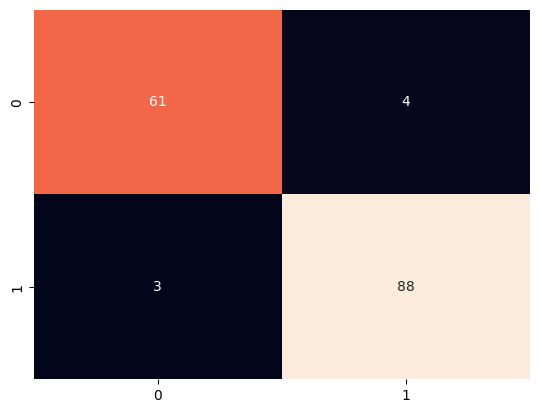

In [10]:
# Creating a confusion matrix

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cbar=False, annot=True)
plt.show()

In [11]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        65
           1       0.96      0.97      0.96        91

    accuracy                           0.96       156
   macro avg       0.95      0.95      0.95       156
weighted avg       0.96      0.96      0.96       156

